In [1]:
library("DESeq2")
library(tidyverse)
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [2]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)

# Import CEV-v1 CRISPRi screening data

In [3]:
validation <- read.csv('/home/tdfair/Desktop/GitHub/CEV-v1_counts.txt', header = TRUE, sep = ",", row.names=1)
validation

,sgID,gene_TSS,C3649_D0_counts,C3649_D10_rep1_counts,C3649_D10_rep2_counts,Pt5C_D0_counts,Pt5C_D10_rep1_counts,Pt5C_D10_rep2_counts,C3624K_D0_counts,C3624K_D10_rep1_counts,C3624K_D10_rep2_counts,C40280L_D0_counts,C40280L_D10_rep1_counts,C40280L_D10_rep2_counts,C40290F_D0_counts,C40290F_D10_rep1_counts,C40290F_D10_rep2_counts,C8861G_D0_counts,C8861G_D10_rep1_counts,C8861G_D10_rep2_counts,C3624K_D0_counts_TF,C3624K_D10_rep1_counts_TF,C3624K_D10_rep2_counts_TF,C8861G_D0_counts_TF,C8861G_D10_rep1_counts_TF,C8861G_D10_rep2_counts_TF,H1hESC_D0_counts,H1hESC_D10_rep1_counts,H1hESC_D10_rep2_counts,H20961B_D0_counts,H20961B_D10_rep1_counts,H20961B_D10_rep1_counts.1,H21792A_D0_counts,H21792A_D10_rep1_counts,H21792A_D10_rep2_counts,H23555A_D0_counts,H23555A_D10_rep1_counts,H23555A_D10_rep2_counts,H28126B_D0_counts,H28126B_D10_rep1_counts,H28126B_D10_rep2_counts,H23555A_D0_counts_TF,H23555A_D10_rep1_counts_TF,H23555A_D10_rep2_counts_TF,H20961B_D0_counts_TF,H20961B_D10_rep1_counts_TF,H20961B_D10_rep2_counts_TF,H28126B_D0_counts_TF,H28126B_D10_rep1_counts_TF,H28126B_D10_rep2_counts_TF
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AATF_-_35306340.23-P1P2,AATF_-_35306340.23-P1P2,AATF__P1P2,603,194,158,335,99,64,696,51,190,1437,1361,1236,1670,1248,1254,176,6,38,2035,170,159,508,174,169,202,136,247,983,165,165,463,53,22,838,107,284,1664,2930,3631,592,297,477,1074,188,303,3192,576,1364
AATF_-_35306346.23-P1P2,AATF_-_35306346.23-P1P2,AATF__P1P2,493,101,93,238,25,32,627,28,55,258,20,16,892,97,51,99,30,1,1659,130,192,294,49,65,192,112,125,759,135,135,471,26,9,573,58,95,1522,2188,1924,461,134,196,592,156,86,1070,249,125
AATF_-_35306333.23-P1P2,AATF_-_35306333.23-P1P2,AATF__P1P2,550,242,176,263,83,74,637,34,37,1405,1715,1492,1122,2080,1133,107,3,4,1690,109,155,263,125,164,206,126,184,696,102,102,255,6,3,647,124,74,587,150,253,542,247,256,667,80,129,403,104,27
AATF_-_35306312.23-P1P2,AATF_-_35306312.23-P1P2,AATF__P1P2,643,101,151,288,16,49,624,23,23,247,24,4,763,21,14,112,1,42,2169,138,233,303,111,183,1312,1637,2036,1578,2048,2048,270,174,37,732,70,155,1707,4254,3172,443,240,103,3641,3479,3350,3165,1413,2052
AATF__P1P2__secondary__FWD__35,AATF__P1P2__secondary__FWD__35,AATF__P1P2,608,267,247,271,283,259,814,50,79,387,148,123,1138,363,323,185,27,94,2311,201,426,957,168,229,273,142,133,1542,290,290,1650,174,144,1595,88,236,1065,799,929,1276,475,347,2035,377,203,1499,169,140
AATF__P1P2__secondary__FWD__50,AATF__P1P2__secondary__FWD__50,AATF__P1P2,626,234,182,321,183,314,826,20,33,490,44,69,1257,405,211,276,49,56,2895,369,375,991,272,159,281,243,195,1481,288,288,1604,223,285,1430,254,56,1264,1059,750,1280,337,301,2343,480,285,1269,170,207
AATF__P1P2__secondary__FWD__53,AATF__P1P2__secondary__FWD__53,AATF__P1P2,597,238,260,353,450,397,837,103,82,587,93,88,1296,677,562,435,160,214,1902,252,507,1651,282,180,358,273,252,1553,269,269,1815,226,219,1348,97,138,1137,658,1010,1219,560,311,1871,605,416,1085,32,96
AATF__P1P2__secondary__FWD__55,AATF__P1P2__secondary__FWD__55,AATF__P1P2,715,400,516,325,463,332,978,106,145,607,203,105,1422,905,677,462,212,81,3718,357,670,1535,719,448,438,234,305,1622,408,408,1932,305,275,1819,123,103,1483,1071,1429,1768,289,399,2907,758,589,1953,218,84
ABCB10__P1P2__primary__RVS__7,ABCB10__P1P2__primary__RVS__7,ABCB10__P1P2,694,1800,1503,296,1932,1461,1032,1497,1405,1305,2598,1985,1370,1999,1908,1137,2031,1524,2899,3607,3991,3169,2201,1984,1123,978,1350,1578,1776,1776,3098,2103,2356,2067,2397,2621,1524,3346,2940,3789,3857,4661,3402,3787,3343,3202,2412,2336


# Counts matrix & metadata

In [4]:
counts <- validation[, 3:ncol(validation)]

In [5]:
metaData <- data.frame(species = c(rep(c('chimpanzee'), times=24), rep(c('human'), times=24)),
                       cell_line = sapply(colnames(counts), function(x) unlist(strsplit(toString(x), split = "_", fixed = TRUE))[1]), 
                       time_point = rep(c('t0','tfinal','tfinal'), times=16), 
                       lab = c(rep(c('MIT'), times=18), rep(c('UCSF'), times=6), rep(c('MIT'), times=15), rep(c('UCSF'), times=9)))
metaData

,species,cell_line,time_point,lab
,<fct>,<fct>,<fct>,<fct>
C3649_D0_counts,chimpanzee,C3649,t0,MIT
C3649_D10_rep1_counts,chimpanzee,C3649,tfinal,MIT
C3649_D10_rep2_counts,chimpanzee,C3649,tfinal,MIT
Pt5C_D0_counts,chimpanzee,Pt5C,t0,MIT
Pt5C_D10_rep1_counts,chimpanzee,Pt5C,tfinal,MIT
Pt5C_D10_rep2_counts,chimpanzee,Pt5C,tfinal,MIT
C3624K_D0_counts,chimpanzee,C3624K,t0,MIT
C3624K_D10_rep1_counts,chimpanzee,C3624K,tfinal,MIT
C3624K_D10_rep2_counts,chimpanzee,C3624K,tfinal,MIT


# Filter CHEK2 sgRNAs

In [6]:
#drop CHEK2 sgRNAs targeting the promoter of essential gene HscB Mitochondrial Iron-Sulfur Cluster Cochaperone (secondary TSS overlap)

chek2_hscb_sgRNAs <- c('CHEK2_+_29138256.23-P1P2', 
                       'CHEK2__P1P2__secondary__FWD__59', 
                       'CHEK2__P1P2__secondary__RVS__58', 
                       'CHEK2__P1P2__secondary__RVS__53')

In [7]:
counts <- counts[!(row.names(counts) %in% chek2_hscb_sgRNAs),]
validation <- validation[!(validation$sgID %in% chek2_hscb_sgRNAs),]

# Run DESeq2 on all cell lines except  C3649 & Pt5-C

Compare the species-specific effect of time (t<sub>0</sub> vs. t<sub>final</sub>) while controlling for individual effects within each species.

In [9]:
#drop C3649 and Pt5-C, MDM2/p53 non-responsive

metaData_reduced <- metaData[-c(1:6), ]

In [10]:
all_lines <- DESeq2::DESeqDataSetFromMatrix(countData = counts[, metaData_reduced %>% rownames], 
                                            colData = metaData_reduced, 
                                            design = ~cell_line + time_point)

factor levels were dropped which had no samples



In [11]:
#add column to distinguish individuals nested within each species

metaData_reduced$cell_line.number <- factor(c(rep(1:4,each=3), rep(1,each=3), rep(4,each=3), 
                                             rep(1:5,each=3), rep(4,each=3), rep(2,each=3), rep(5,each=3)))
metaData_reduced

,species,cell_line,time_point,lab,cell_line.number
,<fct>,<fct>,<fct>,<fct>,<fct>
C3624K_D0_counts,chimpanzee,C3624K,t0,MIT,1
C3624K_D10_rep1_counts,chimpanzee,C3624K,tfinal,MIT,1
C3624K_D10_rep2_counts,chimpanzee,C3624K,tfinal,MIT,1
C40280L_D0_counts,chimpanzee,C40280L,t0,MIT,2
C40280L_D10_rep1_counts,chimpanzee,C40280L,tfinal,MIT,2
C40280L_D10_rep2_counts,chimpanzee,C40280L,tfinal,MIT,2
C40290F_D0_counts,chimpanzee,C40290F,t0,MIT,3
C40290F_D10_rep1_counts,chimpanzee,C40290F,tfinal,MIT,3
C40290F_D10_rep2_counts,chimpanzee,C40290F,tfinal,MIT,3


In [17]:
matrix <- model.matrix(~ species + species:cell_line.number + species:time_point, metaData_reduced)
matrix

,(Intercept),specieshuman,specieschimpanzee:cell_line.number2,specieshuman:cell_line.number2,specieschimpanzee:cell_line.number3,specieshuman:cell_line.number3,specieschimpanzee:cell_line.number4,specieshuman:cell_line.number4,specieschimpanzee:cell_line.number5,specieshuman:cell_line.number5,specieschimpanzee:time_pointtfinal,specieshuman:time_pointtfinal
C3624K_D0_counts,1,0,0,0,0,0,0,0,0,0,0,0
C3624K_D10_rep1_counts,1,0,0,0,0,0,0,0,0,0,1,0
C3624K_D10_rep2_counts,1,0,0,0,0,0,0,0,0,0,1,0
C40280L_D0_counts,1,0,1,0,0,0,0,0,0,0,0,0
C40280L_D10_rep1_counts,1,0,1,0,0,0,0,0,0,0,1,0
C40280L_D10_rep2_counts,1,0,1,0,0,0,0,0,0,0,1,0
C40290F_D0_counts,1,0,0,0,1,0,0,0,0,0,0,0
C40290F_D10_rep1_counts,1,0,0,0,1,0,0,0,0,0,1,0
C40290F_D10_rep2_counts,1,0,0,0,1,0,0,0,0,0,1,0
C8861G_D0_counts,1,0,0,0,0,0,1,0,0,0,0,0


In [18]:
apply(matrix, 2, function(x) all(x==0))

(Intercept)                        specieshuman 
                              FALSE                               FALSE 
specieschimpanzee:cell_line.number2      specieshuman:cell_line.number2 
                              FALSE                               FALSE 
specieschimpanzee:cell_line.number3      specieshuman:cell_line.number3 
                              FALSE                               FALSE 
specieschimpanzee:cell_line.number4      specieshuman:cell_line.number4 
                              FALSE                               FALSE 
specieschimpanzee:cell_line.number5      specieshuman:cell_line.number5 
                               TRUE                               FALSE 
 specieschimpanzee:time_pointtfinal       specieshuman:time_pointtfinal 
                              FALSE                               FALSE

In [19]:
matrix <- matrix[, !grepl("specieschimpanzee:cell_line.number5", colnames(matrix))]

In [20]:
all_lines_DESeq <- DESeq2::DESeq(all_lines, full=matrix, parallel=TRUE)

using supplied model matrix

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 22 workers

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates, fitting model and testing: 22 workers



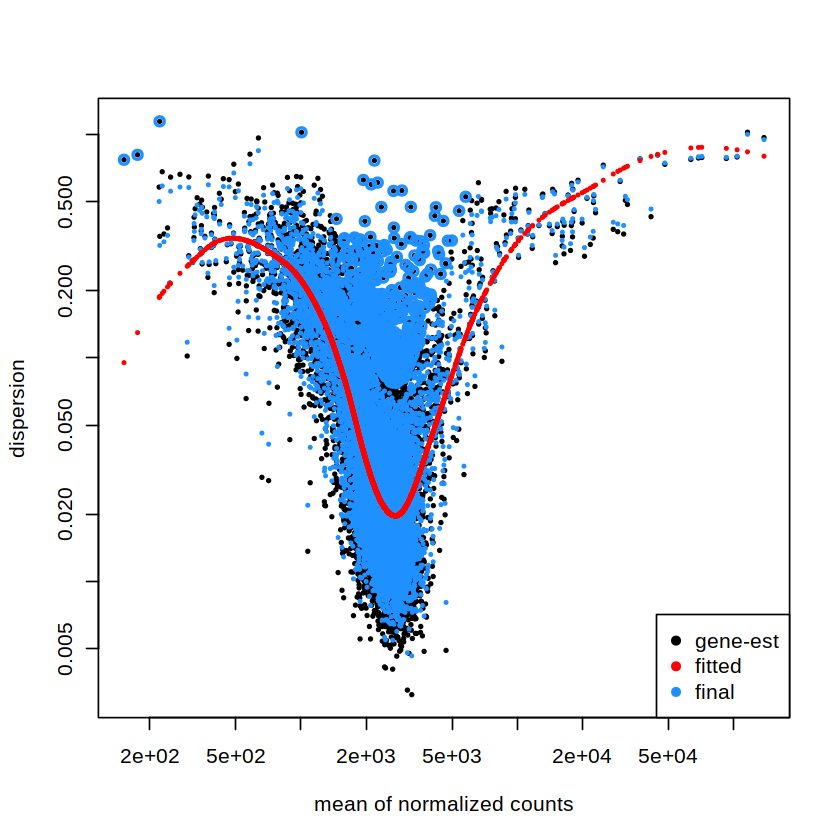

In [21]:
#high variation within condition for sgRNAs with extreme high counts (typically targeting oncogenes/proliferation suppressors)

plotDispEsts(all_lines_DESeq)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



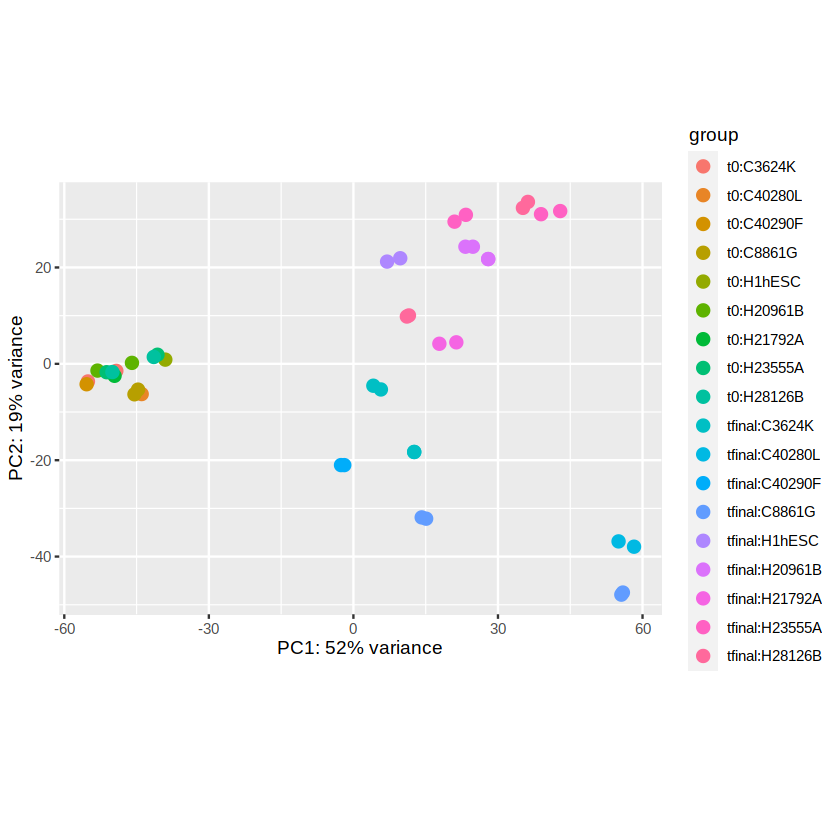

In [22]:
vsd <- vst(all_lines_DESeq, blind=FALSE)
plotPCA(vsd, intgroup=c("time_point", "cell_line"))

In [24]:
#effects in each species

chimp <- data.frame(DESeq2::results(all_lines_DESeq, name='specieschimpanzee.time_pointtfinal'))
human <- data.frame(DESeq2::results(all_lines_DESeq, name='specieshuman.time_pointtfinal'))

In [25]:
#contrast species

chimp_minus_human <- data.frame(DESeq2::results(all_lines_DESeq, contrast=list('specieschimpanzee.time_pointtfinal', 'specieshuman.time_pointtfinal')))

In [29]:
#add sgRNA & TSS

chimp <- cbind(validation[, 1:2], chimp)
human <- cbind(validation[, 1:2], human)
chimp_minus_human <- cbind(validation[, 1:2], chimp_minus_human)

In [30]:
rownames(chimp) <- chimp$sgID
rownames(human) <- human$sgID
rownames(chimp_minus_human) <- chimp_minus_human$sgID

In [32]:
write.csv(chimp,"/home/tdfair/Desktop/GitHub/chimp_CEV-v1_DESeq2.csv", row.names = FALSE)
write.csv(human,"/home/tdfair/Desktop/GitHub/human_CEV-v1_DESeq2.csv", row.names = FALSE)
write.csv(chimp_minus_human,"/home/tdfair/Desktop/GitHub/chimp_minus_human_CEV-v1_DESeq2.csv", row.names = FALSE)

In [34]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /home/tdfair/anaconda3/envs/r_latest/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] forcats_0.5.0               stringr_1.4.0              
 [3] dplyr_1.0.1                 purrr_0.3.4                
 [5] readr_1.3.1                 tidyr_1.1.1                
 [7] tibble_3.0.3                ggplot2_3.3.2              
 [9] tidyverse_1.3.0           